Student Details

Name: Brian Parle

ID: 18200036

All necessary imports are provided. Please do not add further imports.

### Task 4.1
Using the above code, find the optimum regularization parameter, l. In order to do so, you will need to decide on a suitable list of l values. Pick at most 1000 values! Once you have found the optimal l, compare the Eout obtained with this l with the Eout obtained without regularization. You should see an impressive improvement!

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

Below is the exact same data you used for the regression in E-tivity 3, but this time you know exactly what function generated the data

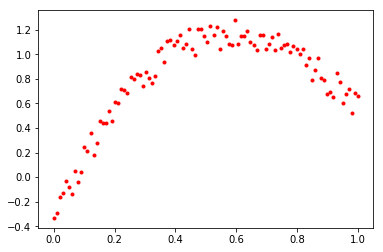

In [3]:
def target(X):
    #return: 0.5X^5-0.5X^3-4.25X^2+5.125X-0.4375
    return 0.5*((X-.5)-10*(X-.5)**2-(X-.5)**3+X**5)+1

points = 100
X = np.linspace(0, 1, points) # 100 values between 0 and 100
noise=np.random.random(points)/4
y_nf = target(X) #noise free target
y = y_nf+noise #noisy target

plt.plot(X,y,'r.')
plt.show()

Below is an implementation of linear regression with regularization

In [4]:
def weights_reg(X,y,l):
    n = len(X)
    m=X.T.dot(X)
    return np.linalg.inv(m+l*np.identity(m.shape[0])).dot(X.T).dot(y)

In [5]:
def lin_reg(w,X):
    # Calculation of outputs given weights and data (X). Note that X needs to contain the bias of 1. 
    out=[]
    for x in X:
        out.append(w.T.dot(x))
    return np.array(out)

In [6]:
def calc_error(w,X,y):
    # Calculate the error as the mean squared error
    pred = lin_reg(w,X)
    return math.sqrt((pred-np.array(y)).dot(pred-np.array(y))/len(X))

To create higher order features:

In [7]:
def transPoly(X, power):
    # Extend the data in X with a bias (1) and powers of the feature up to 'power'
    ones = np.ones((X.shape[0],1))
    extra=[]
    for x in X:
        row=[]
        for p in range(2,power+1):
            row.append(x**p)
        extra.append(row)
    return np.concatenate((ones, X.reshape(len(X),1),np.array(extra)),1)

Iterate over lambda, train the model and calculate Eout. Plot the latter versus lambda to see how much regularization is required.

In [8]:
ein=[]
eout=[]
weights=[]
#most regularization is happenning for very low lambdas, so focus on lambdas in the domain 0-0.1 and nearer to zero
lambdas = np.geomspace(0.0000001, 1, num=1000)
X_trans = transPoly(X,50)
# random_state fixed to get reproducible (and 'good'! :-)) results
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, train_size=0.9, random_state =5)
for l in lambdas:    
    w = weights_reg(X_train,y_train,l)
    ein.append(calc_error(w,X_train,y_train))
    eout.append(calc_error(w,X_test,y_test))
    weights.append(w)


/Users/brianparle/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [28]:
#find optimal L (giving smallest Eout)
eout_min = min(eout)
eout_min_index = eout.index(eout_min)
labda_min_eout = lambdas[eout_min_index]

#Compare the Eout obtained with this l with the Eout obtained without regularization.
#No regularization => lambda=0
w = weights_reg(X_train,y_train,0)
eout_no_reg = calc_error(w,X_test,y_test)

print('Min Eout = ', eout_min)
print('Lambda for min Eout = ', labda_min_eout)
print('Eout for no regularization = ', eout_no_reg)

Min Eout =  0.05324101478897215
Lambda for min Eout =  0.00014694918006248172
Eout for no regularization =  1.9561593777557118


### Task 4.2 Provide the following plots:

- A plot showing the estimate of Eout vs l on the domain [0,1]
- A plot with three sub-plots containing an overfitted model, a model with the optimal l, and an underfitted model. In each plot, you should plot the target function in addition to the final hypothesis. Choose values for l that clearly demonstrate over- and underfitting.

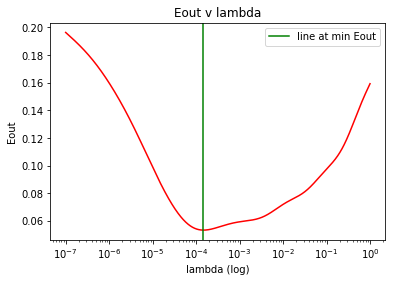

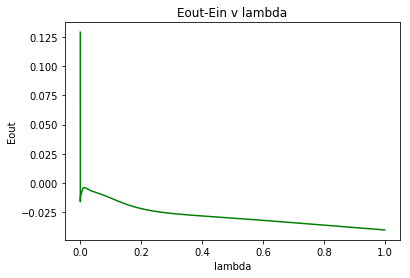

In [29]:
#plot data
plt.plot(lambdas, eout, c='r')
plt.axvline(x=labda_min_eout, label='line at min Eout', c='g')
plt.title('Eout v lambda')
plt.ylabel('Eout')
plt.xlabel('lambda (log)')
plt.legend(loc='upper right')
#the lambda spacing is log spaced, so set the scale to log to stretch out the plot
plt.xscale('log')
plt.show()
ein_arr = np.asarray(ein)
eout_arr = np.asarray(eout)
plt.plot(lambdas, eout_arr - ein_arr, c='g', label='Eout-Ein')
plt.title('Eout-Ein v lambda')
plt.ylabel('Eout')
plt.xlabel('lambda')
plt.show()

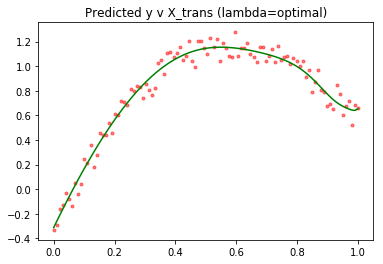

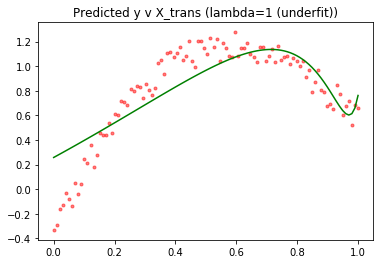

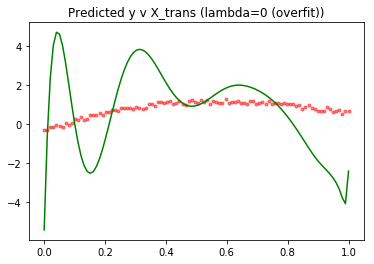

In [40]:
#generate models for overfit, optimal l and underfit
#also generate the predicted values using the model weights ansd linear regression

#optimal l
w_l = weights_reg(X_train, y_train, labda_min_eout)
pred_l = lin_reg(w_l, X_trans)

#underfit, l too high
w_underfit = weights_reg(X_train, y_train, 1)
pred_underfit = lin_reg(w_underfit, X_trans)

#overfit, l too low
w_overfit = weights_reg(X_train, y_train, 0)
pred_overfit = lin_reg(w_overfit, X_trans)

plt.plot(X, y ,'r.', alpha=0.5)
plt.plot(X, pred_l, 'g')
plt.title('Predicted y v X_trans (lambda=optimal)')
plt.show()

plt.plot(X, y, 'r.', alpha=0.5)
plt.plot(X, pred_underfit, 'g')
plt.title('Predicted y v X_trans (lambda=1 (underfit))')
plt.show()

plt.plot(X, y, 'r.', alpha=0.5)
plt.plot(X, pred_overfit, 'g')
plt.title('Predicted y v X_trans (lambda=0 (overfit))')
plt.show()

#### Task 5 (CE6002)
Use the code from Task 4 and perform the same analysis using 10-fold cross-validation. Use Scikitlearn’s KFOLD for this and think carefully about the parameters you use in KFOLD. Note that the data set provided is ordered by increasing X.

In [31]:
#split data into training and test data sets
#with the training data:
#k=10
#generate k folds
#pick a set of lambdas 1..1000
#for each fold:
#    for each lambda:
#        train model using this lambda
#        calculate validation error
#        add the eval/eout for this fold and lambda to an array
#    add the eval/eout for this fold and lambda to a cumulative array
#divide the summed lambdas by 10
#pick the best lambda across all the k-fold averaged lambdas
#validate final hypothesis using main test data set

In [36]:
lambdas_eouts = np.zeros(lambdas.shape[0])
k=10
#Shuffle the data for the folds as the source data set is ordered by x
kf = KFold(n_splits=10, random_state=5, shuffle=True)
for train_index, test_index in kf.split(X_trans):
    ein=[]
    eout=[]
    weights=[]
    X_train, X_test = X_trans[train_index], X_trans[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for l_index, l in enumerate(lambdas):    
        w = weights_reg(X_train,y_train,l)
        ein.append(calc_error(w,X_train,y_train))
        this_eout = calc_error(w,X_test,y_test)
        eout.append(this_eout)
        weights.append(w)
        lambdas_eouts[l_index] += this_eout
lambdas_eouts = lambdas_eouts / 10

In [38]:
#find optimal L (giving smallest Eout across K Folds)
eout_min_index = np.argmin(lambdas_eouts)
eout_min = lambdas_eouts[eout_min_index]
labda_min_eout = lambdas[eout_min_index]

print('Min Eout = ', eout_min)
print('Lambda for min Eout = ', labda_min_eout)

Min Eout =  0.07344634348171196
Lambda for min Eout =  0.0001933242287555045


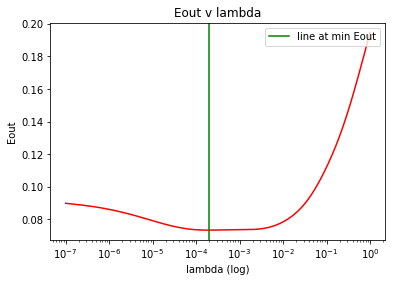

In [41]:
#plot data for the Lambdas generated
plt.plot(lambdas, lambdas_eouts, c='r')
plt.axvline(x=labda_min_eout, label='line at min Eout', c='g')
plt.title('Eout v lambda')
plt.ylabel('Eout')
plt.xlabel('lambda (log)')
plt.legend(loc='upper right')
#the lambda spacing is log spaced, so set the scale to log to stretch out the plot
plt.xscale('log')
plt.show()

The min Eout achieved using K-Fold is not as small as for the previous method, but low values for Eout seem to have been consistently generated as seen by the fairly flat curve above.

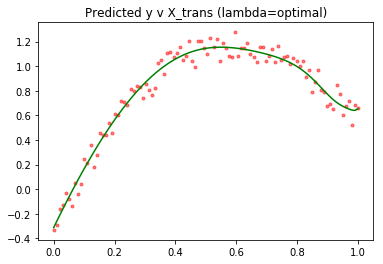

In [42]:
#Generate a plot for the optimal l generated using K-Fold
w_l = weights_reg(X_train, y_train, labda_min_eout)
pred_l = lin_reg(w_l, X_trans)

plt.plot(X, y ,'r.', alpha=0.5)
plt.plot(X, pred_l, 'g')
plt.title('Predicted y v X_trans (lambda=optimal)')
plt.show()

#### Task 6 (CE6002)
Use scikit-learn’s RidgeCV and LassoCV to obtain optimum l using the same transformed data (i.e. features up to 50th order).
- Observe the resulting Eout, and l compare these to previous results. What do you see? Is this what you expected?
- Compare the weights obtained with RidgeCV to those obtained with LassoCV. What do you see? Is this what you expected?